In [121]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

# **Reticolo B1**

In [122]:
Q_12_280 = np.loadtxt('Q_12_280.out')
Qsquare_12_280=np.mean(Q_12_280**2) #calcolo <Q2>
Qsquare_12_280_err=sqrt((np.mean(Q_12_280**4)-Qsquare_12_280**2)/len(Q_12_280)) #calcolo errore
print('<Q2> =', Qsquare_12_280, '±', Qsquare_12_280_err)


<Q2> = 1.6109668510028254 ± 0.07202329755750296


In [123]:
Qsquare_12=Qsquare_12_280
Qsquare_12_err=Qsquare_12_280_err

In [124]:
t0a2_12=2.79
chi_12=t0a2_12*Qsquare_12/12**4
chi_12_err=t0a2_12*Qsquare_12_err/12**4

# **Reticolo B2**

In [125]:
Q_16b_350 = np.loadtxt('1_16b_350.out')
Qsquare_16b_350=np.mean(Q_16b_350**2) #calcolo <Q2>
Qsquare_16b_350_err=np.std(Q_16b_350**2)/sqrt(len(Q_16b_350)) #calcolo errore
print('<Q2> =', Qsquare_16b_350, '±', Qsquare_16b_350_err)


<Q2> = 2.825173167961285 ± 0.11940091647105588


In [126]:
Q_16b_400 = np.loadtxt('1_16b_400.out')
Qsquare_16b_400=np.mean(Q_16b_400**2) #calcolo <Q2>
Qsquare_16b_400_err=np.std(Q_16b_350**2)/sqrt(len(Q_16b_400)) #calcolo errore

print('<Q2> =', Qsquare_16b_400, '±', Qsquare_16b_400_err)

<Q2> = 2.850626054626544 ± 0.11940091647105588


In [141]:
Qsquare_16b=np.mean([Qsquare_16b_350, Qsquare_16b_400])
Qsquare_16b_err=sqrt(Qsquare_16b_350_err**2+Qsquare_16b_400_err**2)/2
print('<Q2> =', Qsquare_16b, '±', Qsquare_16b_err)
#Qsquare_16b*(14/16)**4

<Q2> = 2.8378996112939143 ± 0.08442919771657215


In [128]:
t0a2_16b=3.78
chi_16b=t0a2_16b**2*Qsquare_16b/16**4
chi_16b_err=t0a2_16b**2*Qsquare_16b_err/16**4



# **Reticolo B4**

# **Estrapolazione al continuo**

In [129]:
import scipy.stats as stats

In [136]:
x=np.array([1/t0a2_12, 1/t0a2_16b])
y=np.array([chi_12, chi_16b])
sigma_y=np.array([chi_12_err, chi_16b_err])
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y, sigma_y)


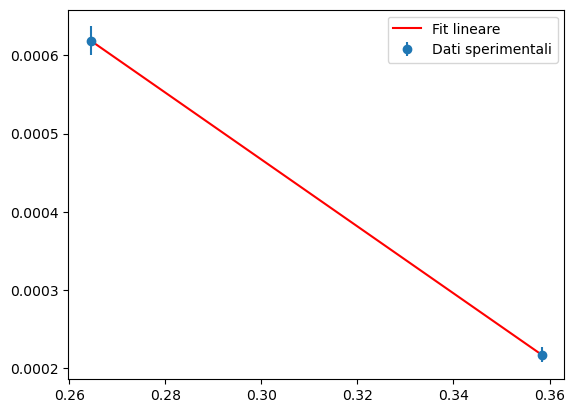

In [140]:
plt.plot(x, slope * x + intercept, 'r', label='Fit lineare')
plt.errorbar(x, y, yerr=sigma_y, fmt='o', label='Dati sperimentali')
plt.legend()
plt.show()
